In [ ]:
## importing file in python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/assignment 1')


In [ ]:
# importing libraries
# importing libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
#loading the dataset in python

# Initialize empty lists to store labels and feature-value dictionaries
labels = []
feature_dicts = []

# Read the file line by line
with open('dataset.txt', 'r') as file:
    for line in file:
        parts = line.strip().split()  # Split the line by whitespace
        label = parts[0]  # The first part is the class label
        features = parts[1:]  # The remaining parts are feature-value pairs

        # Create a dictionary for feature-value pairs
        feature_dict = {}
        for feature in features:
            feature_num, feature_value = feature.split(':')
            feature_dict[int(feature_num)] = float(feature_value)

        # Append the label and feature dictionary to the respective lists
        labels.append(label)
        feature_dicts.append(feature_dict)

# Create a Pandas DataFrame from the list of dictionaries
dataset = pd.DataFrame(feature_dicts)

# Rename columns to match feature numbers
dataset.columns = [f'f{num}' for num in dataset.columns]

# Add the 'class' column based on the labels
dataset['class'] = labels

# Print the resulting DataFrame
print(dataset.head())


         f1        f2        f3        f4        f5        f6        f7  \
0 -0.294118  0.487437  0.180328 -0.292929 -1.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141 -1.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180 -1.000000 -1.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4 -1.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

         f8 class  
0 -0.033333    -1  
1 -0.666667    +1  
2 -0.633333    -1  
3 -1.000000    +1  
4 -0.600000    -1  


In [ ]:
dataset['class'] = dataset['class'].astype(float)

In [ ]:
type(dataset['class'][0])

numpy.float64

In [ ]:
# steps for preprocessing
# # 1. Data Cleaning:DONE
    #  Check for missing values: Ensure that there are no missing values in your dataset. If there are    missing values, you can either remove the corresponding rows or use techniques like imputation to fill in missing data.
   #  Outlier handling: Identify and deal with outliers in your dataset. Outliers can significantly affect the performance of the perceptron. You can either remove outliers or transform them.

# 2.Feature Scaling: USING PRE SCALED DATA
   # - Scale your features: Standardize or normalize your feature values to have a mean of 0 and a standard deviation of 1. This can help the perceptron converge faster and perform better.

# 3. Feature Selection/Engineering: INCONCLUSIVE SCATTERPLOT ATER PCA
   # - Select relevant features: Identify and keep only the features that are most relevant to your problem. Eliminate irrelevant or redundant features to reduce dimensionality.
   # - Create new features: Sometimes, creating new features based on domain knowledge can improve the perceptron's performance.

# 4. Handling Categorical Variables: NO CATEGORICAL DATA FOUND.
  #  - If your dataset contains categorical variables, you may need to encode them into numerical values. Common techniques include one-hot encoding or label encoding.

# 5. Data Splitting:DONE
   # - Split your dataset into training, validation, and test sets. This is essential for evaluating the model's performance and preventing overfitting.
# 6. Data Balance: WILL TRY LATER
   # - If your dataset is imbalanced (i.e., one class has significantly fewer samples than others), consider techniques like oversampling, undersampling, or using class weights to address the imbalance.

# 7. Data Normalization: NOT NEEDED SINCE DATA IS ALREADY SCALED.
   # - If the distribution of your target variable is imbalanced or skewed, you may need to apply transformations (e.g., log transformation) to make it more normally distributed.

# 8. Feature Scaling:NOT NEEDED. WILL TRY LATER IF NEEDED
   # - Normalize or standardize your feature values. This ensures that features with different scales do not disproportionately influence the perceptron's learning.

# 9. Feature Extraction (Optional): PCA DONE ALREADY
   # - Consider dimensionality reduction techniques such as Principal Component Analysis (PCA) or feature selection methods if your dataset has a high number of features.

# 10. Data Shuffling:WILL DO LATER IF REQUIRED
    # - Randomly shuffle your training data to ensure that the perceptron doesn't learn any sequence or order-related patterns.


In [ ]:
# Checking for nan or missing values
nan = dataset.isna().sum().sum()
nan

9

In [ ]:
# removing rows with nan values
dataset.dropna(inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      759 non-null    float64
 1   f2      759 non-null    float64
 2   f3      759 non-null    float64
 3   f4      759 non-null    float64
 4   f5      759 non-null    float64
 5   f6      759 non-null    float64
 6   f7      759 non-null    float64
 7   f8      759 non-null    float64
 8   class   759 non-null    float64
dtypes: float64(9)
memory usage: 59.3 KB


In [ ]:
y= dataset['class']
y

0     -1.0
1      1.0
2     -1.0
3      1.0
4     -1.0
      ... 
763    1.0
764    1.0
765    1.0
766   -1.0
767    1.0
Name: class, Length: 759, dtype: float64

In [ ]:
pos = []
neg = []
for ele in dataset['class']:
  if ele == 1:
    pos.append(ele)
  else:
    neg.append(ele)
print(len(pos))
print(len(neg))

496
263


In [ ]:
# PCA to understand feature selection better.
X = dataset.drop(columns= ['class'])
# cov_mat = np.cov(x, rowvar = False)
# eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
var_explained = pca.explained_variance_ratio_
var_explained

array([0.30582122, 0.21336991])

In [ ]:
X_pca[0:7]

array([[ 0.61780289,  0.1910849 ],
       [-0.3733199 , -0.15019256],
       [ 0.44947364, -0.24908564],
       [-0.58506792, -0.12145007],
       [-0.34424838,  0.75002356],
       [ 0.04892479, -0.45940903],
       [-0.40825767, -0.14879227]])

In [ ]:
# visualising the data
X_pca[:7,1]

array([ 0.1910849 , -0.15019256, -0.24908564, -0.12145007,  0.75002356,
       -0.45940903, -0.14879227])

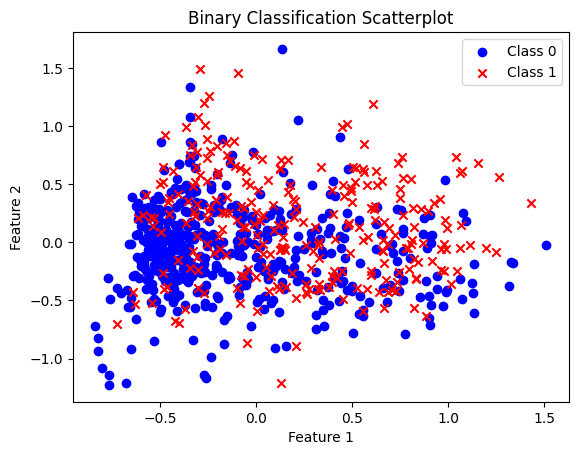

In [ ]:
class_0 = X_pca[y == +1]
class_1 = X_pca[y == -1]

# Create a scatterplot
plt.scatter(class_0[:, 0], class_0[:, 1], label='Class 0', c='blue', marker='o')
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', c='red', marker='x')

# Customize the plot
plt.title('Binary Classification Scatterplot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()

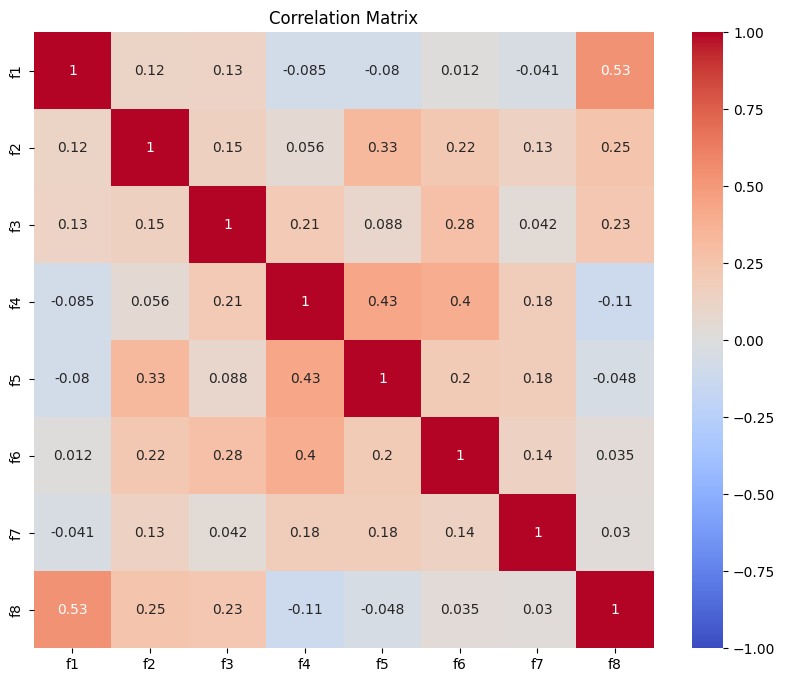

In [ ]:
import seaborn as sns
corr_mat = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
# since there is no value between any two features that is very close or equal to 1, we need to consider all the features and cannot combine two features.

In [ ]:
# no result after pca

In [ ]:
# checking if there's any categorical data in my dataset
types = dataset.dtypes
cat_cols = types[types == 'object'].index.tolist()
cat_cols

[]

In [ ]:
# Splitting data for further processing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
y_train = (y_train + 1) / 2
y_test = (y_test + 1) / 2

# Convert data and labels to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


<ipython-input-23-8fc1dd33ed4d>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-23-8fc1dd33ed4d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-23-8fc1dd33ed4d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_features):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_features, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
        # self.dropout = nn.Dropout(0.2)  # Add dropout for regularization

    def forward(self, x):
        # x = self.layers(x)
        # x = self.dropout(x)  # Apply dropout after each layer
        return self.layers(x)

In [ ]:
input_features = X_train.shape[1]  # Adjust this based on your input data
model = MLP(input_features)


In [ ]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
# optimizer = optim.Adam(model.parameters(), lr=0.001) #gives max 79.61 at 500 epochs and 0.001 lr
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)# this model is not learning the accuracy is same for all values of lr and epochs - 78.29
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

In [ ]:
loss_items = []
# Training loop
for epoch in range(500):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    loss_it = loss.item()
    loss_items.append(loss_it)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [ ]:
from sklearn.metrics import accuracy_score
accuracies = []
# Evaluation
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted_labels = (test_outputs >= 0.5).squeeze().numpy()  # Convert to 0 or 1

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, predicted_labels)
accuracies.append(accuracy)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Accuracy on the test set: 80.92%


In [ ]:
print("Predicted Labels:", predicted_labels)
print("True Labels:", y_test)


Predicted Labels: [ True False  True  True False False False  True  True  True  True  True
  True False  True False  True False False False  True  True  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True False False False False  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True False  True  True  True
  True  True  True  True False False  True  True False  True  True  True
  True False  True  True  True False  True  True  True False False False
  True  True  True  True  True  True  True False  True  True False False
 False  True  True  True  True  True  True  True False  True False False
  True  True False  True  True  True  True  True  True  True False  True
 False False  True  True  True  True False  True]
True Labels: tensor([1., 0., 0., 1., 0., 1., 1., 1., 1.,

In [ ]:
X_train.shape

torch.Size([607, 8])

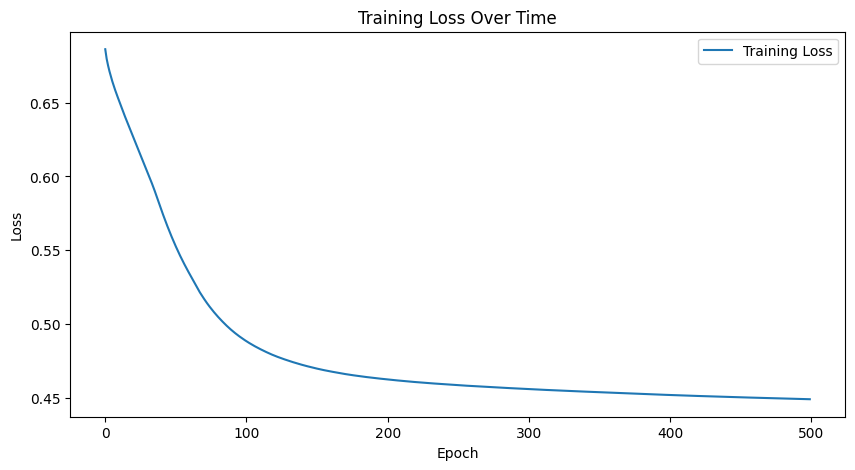

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(loss_items, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Over Time')
plt.show()

In [ ]:
# F1 score
from sklearn.metrics import f1_score
# TP = np.sum((y_train == 1) & (y_test == 1))
# FP = np.sum((y_train == 0) & (y_test == 1))
# FN = np.sum((y_train == 1) & (y_test == 0))
# TN = np.sum((y_train == 0) & (y_test == 0))

# Calculate Precision and Recall
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)

# Calculate F1 Score
f1score = f1_score(y_test, predicted_labels)

print("F1 Score:", f1score)

F1 Score: 0.8663594470046083
